## Import Library

In [1]:
import os
import cv2
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt

## Load Data

In [2]:
base_dir = 'FaceMask-Dataset'
categories = os.listdir(base_dir)
labels = [i for i in range (len(categories))]
label_dict = dict(zip(categories, labels))

print(categories)
print(labels)
print(label_dict)

['without_mask', 'with_mask']
[0, 1]
{'without_mask': 0, 'with_mask': 1}


## Data Preprocessing

In [3]:
img_size=100
data=[]
target=[]

for category in categories:
    path=os.path.join(base_dir,category)
    img_names=os.listdir(path)
        
    for img_name in img_names:
        img_path=os.path.join(path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            target.append(label_dict[category])

        except Exception as e:
            print('Exception:',e) 

In [4]:
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)
#new_target=np_utils.to_categorical(target)

In [ ]:
np.save('data',data)
np.save('target',new_target)

In [5]:
data

array([[[[0.03529412],
         [0.03529412],
         [0.03921569],
         ...,
         [0.08235294],
         [0.10588235],
         [0.10588235]],

        [[0.03137255],
         [0.03137255],
         [0.02745098],
         ...,
         [0.03137255],
         [0.05098039],
         [0.05882353]],

        [[0.04705882],
         [0.03921569],
         [0.03921569],
         ...,
         [0.01568627],
         [0.01568627],
         [0.01568627]],

        ...,

        [[0.25882353],
         [0.2627451 ],
         [0.22745098],
         ...,
         [0.00392157],
         [0.        ],
         [0.        ]],

        [[0.25882353],
         [0.25098039],
         [0.20784314],
         ...,
         [0.00784314],
         [0.        ],
         [0.        ]],

        [[0.23529412],
         [0.21960784],
         [0.19215686],
         ...,
         [0.00784314],
         [0.        ],
         [0.        ]]],


       [[[0.36470588],
         [0.35686275],
         [0.35

In [6]:
target

array([0, 0, 0, ..., 1, 1, 1])

## Modelling and compile 

In [7]:
model = Sequential([
    Conv2D(200, (3,3),  input_shape=data.shape[1:]),
    Activation('relu'),
    MaxPooling2D(2, 2),
    Conv2D(100, (3,3)),
    Activation('relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       2000      
                                                                 
 activation (Activation)     (None, 98, 98, 200)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 200)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 100)       180100    
                                                                 
 activation_1 (Activation)   (None, 47, 47, 100)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 100)      0         
 2D)                                                    

In [9]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

## Split Data

In [10]:
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2, random_state=1)

In [11]:
print('Jumlah train_data :', len(train_data))
print('Jumlah train_target :', len(train_target))
print('Jumlah test_data :', len(test_data))
print('Jumlah test_target :', len(test_target))

Jumlah train_data : 8000
Jumlah train_target : 8000
Jumlah test_data : 2000
Jumlah test_target : 2000


## Callback

In [20]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')==1) and (logs.get('val_accuracy')==1):
            print("\nAkurasi telah mencapai nilai maksimal, stop training!")
            self.model.stop_training = True
callbacks = myCallback()

## Training

In [12]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')

In [13]:
history=model.fit(train_data,
                  train_target,
                  epochs=10,
                  validation_split=0.2,
                  callbacks=[checkpoint]
                  )

Epoch 1/10
200/200 [==============================] - ETA: 0s - loss: 0.4142 - accuracy: 0.8052

INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


200/200 [==============================] - 297s 1s/step - loss: 0.4142 - accuracy: 0.8052 - val_loss: 0.2458 - val_accuracy: 0.9075
Epoch 2/10
200/200 [==============================] - ETA: 0s - loss: 0.2363 - accuracy: 0.9041

INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


200/200 [==============================] - 308s 2s/step - loss: 0.2363 - accuracy: 0.9041 - val_loss: 0.2102 - val_accuracy: 0.9131
Epoch 3/10
200/200 [==============================] - ETA: 0s - loss: 0.1756 - accuracy: 0.9331

INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


200/200 [==============================] - 303s 2s/step - loss: 0.1756 - accuracy: 0.9331 - val_loss: 0.2099 - val_accuracy: 0.9106
Epoch 4/10
200/200 [==============================] - ETA: 0s - loss: 0.1432 - accuracy: 0.9470

INFO:tensorflow:Assets written to: model-004.model\assets


INFO:tensorflow:Assets written to: model-004.model\assets


200/200 [==============================] - 296s 1s/step - loss: 0.1432 - accuracy: 0.9470 - val_loss: 0.1305 - val_accuracy: 0.9538
Epoch 5/10
200/200 [==============================] - ETA: 0s - loss: 0.1164 - accuracy: 0.9558

INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


200/200 [==============================] - 293s 1s/step - loss: 0.1164 - accuracy: 0.9558 - val_loss: 0.1255 - val_accuracy: 0.9581
Epoch 6/10
200/200 [==============================] - 277s 1s/step - loss: 0.0920 - accuracy: 0.9656 - val_loss: 0.1271 - val_accuracy: 0.9556
Epoch 7/10
200/200 [==============================] - ETA: 0s - loss: 0.0751 - accuracy: 0.9716

INFO:tensorflow:Assets written to: model-007.model\assets


INFO:tensorflow:Assets written to: model-007.model\assets


200/200 [==============================] - 285s 1s/step - loss: 0.0751 - accuracy: 0.9716 - val_loss: 0.1168 - val_accuracy: 0.9625
Epoch 8/10
200/200 [==============================] - ETA: 0s - loss: 0.0605 - accuracy: 0.9777

INFO:tensorflow:Assets written to: model-008.model\assets


INFO:tensorflow:Assets written to: model-008.model\assets


200/200 [==============================] - 297s 1s/step - loss: 0.0605 - accuracy: 0.9777 - val_loss: 0.1145 - val_accuracy: 0.9675
Epoch 9/10
200/200 [==============================] - 287s 1s/step - loss: 0.0525 - accuracy: 0.9803 - val_loss: 0.1604 - val_accuracy: 0.9531
Epoch 10/10
200/200 [==============================] - 301s 2s/step - loss: 0.0428 - accuracy: 0.9839 - val_loss: 0.1213 - val_accuracy: 0.9688


## Plot Accuracy and Loss 

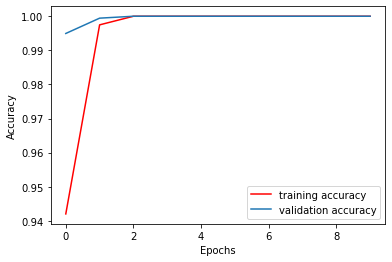

In [15]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

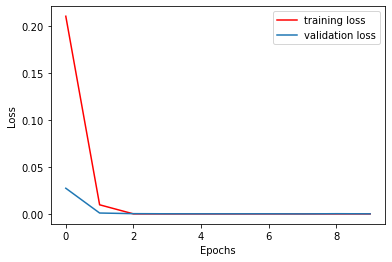

In [16]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluate and Save Model

In [17]:
print(model.evaluate(test_data,test_target))

70/70 [==============================] - 6s 79ms/step - loss: 6.6772e-08 - accuracy: 1.0000
[6.677247199604608e-08, 1.0]


In [25]:
model.save('facemask-detection-model.h5')